In [ ]:
import pandas as pd
import re

# Define the path to your file
file_path = "C:\\Users\\HP\\Downloads\\trajectory_output (1).txt"


# Initialize variables to store data
data = {
    'ID': [],
    'Category': [],
    'Time': [],
    'Position_X': [],
    'Position_Y': [],
    'Speed': []
}
current_id = None
current_category = None

# Regular expression to match the different lines
id_cat_pattern = re.compile(r"ID: (\d+), Category: (\w+)")
data_pattern = re.compile(r"Time: (\d{2}:\d{2}:\d{2},\d+), Position: \(([\d.]+),([\d.]+)\), Speed: ([\d.]+)")

# Read the file and parse data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith('ID'):
            match = id_cat_pattern.search(line)
            if match:
                current_id = int(match.group(1))
                current_category = match.group(2)
        else:
            match = data_pattern.search(line)
            if match:
                data['ID'].append(current_id)
                data['Category'].append(current_category)
                data['Time'].append(match.group(1))
                data['Position_X'].append(float(match.group(2)))
                data['Position_Y'].append(float(match.group(3)))
                data['Speed'].append(float(match.group(4)))

# Create DataFrame
df = pd.DataFrame(data)

# Show the DataFrame
print(df.head())


   ID   Category          Time  Position_X  Position_Y     Speed
0   2  motorbike  09:58:52,751       579.5       529.5  7.049429
1   2  motorbike  09:58:55,674       600.5       527.0  7.220726
2   2  motorbike  09:58:58,527       621.0       520.0  1.581139
3   2  motorbike  09:59:01,374       616.5       518.5  1.950783
4   2  motorbike  09:59:04,934       622.0       520.5  4.001953


In [ ]:
df.shape

(8751, 6)

In [ ]:
df.to_csv('trajectory.csv', index=False)

In [ ]:
df.sample(10)

,ID,Category,Time,Position_X,Position_Y,Speed
929,32,person,"10:05:04,693",1087.0,610.0,3.171050
5101,223,bicycle,"10:11:05,727",491.5,725.5,8.303279
7690,515,motorbike,"10:12:06,928",697.5,626.5,3.824265
8623,796,person,"10:17:02,297",208.5,627.0,2.848001
1629,74,motorbike,"10:09:03,516",1559.0,850.5,1.500000
6275,359,person,"10:09:45,009",57.0,743.5,3.214032
4340,191,bicycle,"10:01:40,255",484.5,1044.0,9.086391
3950,177,person,"10:04:01,147",108.5,703.0,0.637377
5218,245,truck,"10:09:16,105",643.5,676.0,3.184162
1818,89,truck,"10:07:23,282",486.0,902.5,4.126894


### Trajectory Analysis

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('trajectory.csv')

In [ ]:
df.sample(10)

,ID,Category,Time,Position_X,Position_Y,Speed
6703,390,bicycle,"10:17:25,314",799.5,398.5,2.460804
7214,474,person,"10:14:51,718",711.0,599.5,1.179248
5017,223,bicycle,"10:04:33,577",1162.5,617.5,0.527046
4734,203,motorbike,"10:12:33,084",265.0,785.0,8.003905
2793,123,truck,"10:05:14,541",103.5,860.5,0.372678
6165,357,person,"10:08:46,544",332.0,715.0,3.186887
4314,189,person,"10:05:32,715",182.5,1010.0,4.669642
8688,831,person,"10:17:33,971",337.0,427.0,0.921954
5097,223,bicycle,"10:10:52,585",521.5,713.5,2.867442
8065,589,bicycle,"10:16:49,254",1539.0,585.0,3.760555


In [ ]:
df['Category'].unique()

array(['motorbike', 'person', 'umbrella', 'truck', 'bicycle', 'car',
       'backpack'], dtype=object)

In [ ]:
df.shape

(8751, 6)

In [ ]:
df = df[~df['Category'].isin(['umbrella', 'backpack'])]

In [ ]:
df.shape

(8694, 6)

In [ ]:
grouped = df.groupby('ID')

In [ ]:
dfs = {}
for group_id, group_data in grouped:
    dfs[group_id] = group_data

In [ ]:
for key, value in dfs.items():
    print(f"DataFrame for ID {key}:")
    print(value)
    print("\n")

DataFrame for ID 2:
     ID   Category          Time  Position_X  Position_Y     Speed
0     2  motorbike  09:58:52,751       579.5       529.5  7.049429
1     2  motorbike  09:58:55,674       600.5       527.0  7.220726
2     2  motorbike  09:58:58,527       621.0       520.0  1.581139
3     2  motorbike  09:59:01,374       616.5       518.5  1.950783
4     2  motorbike  09:59:04,934       622.0       520.5  4.001953
..   ..        ...           ...         ...         ...       ...
140   2  motorbike  10:11:47,688       270.5       712.0  4.487637
141   2  motorbike  10:11:50,532       283.5       708.5  7.195678
142   2  motorbike  10:11:53,563       304.5       703.5  1.424001
143   2  motorbike  10:11:56,986       300.5       705.0  2.616133
144   2  motorbike  10:13:34,956        46.0       736.0  1.509231

[145 rows x 6 columns]


DataFrame for ID 4:
     ID Category          Time  Position_X  Position_Y      Speed
145   4   person  09:58:52,752       371.0       611.0   2.52212

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

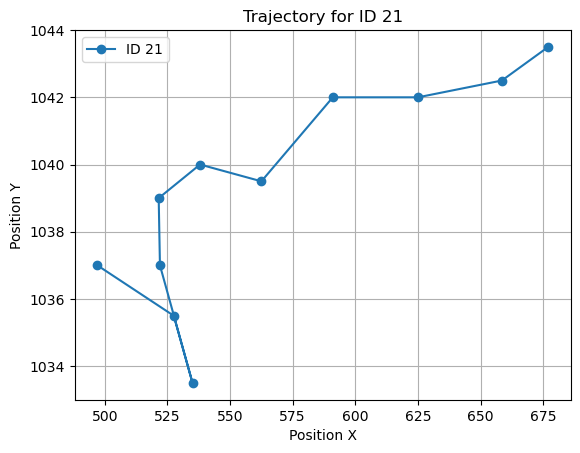

In [ ]:
for key, value in dfs.items():
    if key == 21:
        plt.figure()
        plt.plot(value['Position_X'], value['Position_Y'], marker='o', linestyle='-', label=f'ID {key}')
        plt.title(f'Trajectory for ID {key}')
        plt.xlabel('Position X')
        plt.ylabel('Position Y')
        plt.legend()
        plt.grid(True)
        plt.show()

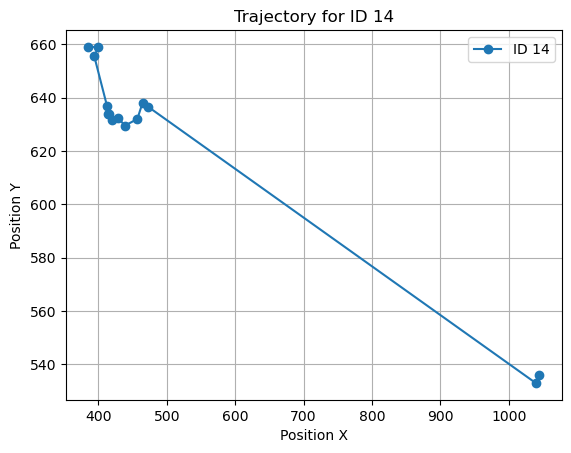

In [ ]:
for key, value in dfs.items():
    if key == 14:
        plt.figure()
        plt.plot(value['Position_X'], value['Position_Y'], marker='o', linestyle='-', label=f'ID {key}')
        plt.title(f'Trajectory for ID {key}')
        plt.xlabel('Position X')
        plt.ylabel('Position Y')
        plt.legend()
        plt.grid(True)
        plt.show()